In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

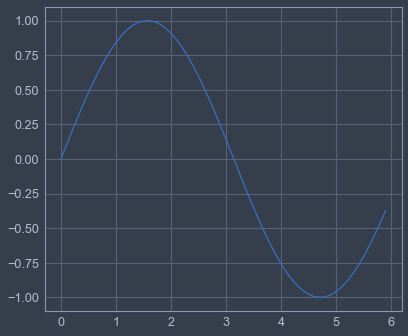

In [4]:
x = np.arange(0,6,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.show()

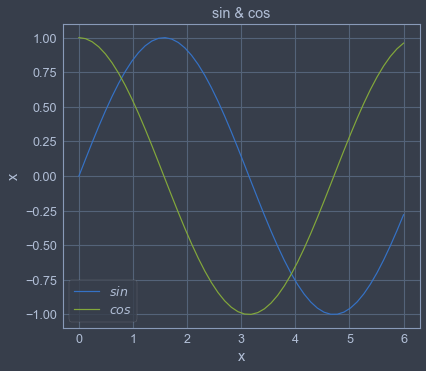

In [9]:
x = np.linspace(0,6)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.plot(x, y_1, label=r'$sin$')
plt.plot(x, y_2, label=r'$cos$')
plt.xlabel(r'x')
plt.ylabel(r'x')
plt.title(r'sin & cos')
plt.legend()
plt.show()

In [10]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp < theta:
        return 0
    else :
        return 1

print(AND(0,0), AND(0,1), AND(1,0), AND(1,1))

0 0 0 1


In [11]:
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
w*x

array([0. , 0.5])

In [12]:
def AND(x1,x2):
    """
    add bias
    """
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else :
        return 1
print(AND(0,0), AND(0,1), AND(1,0), AND(1,1))

0 0 0 1


In [15]:
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else :
        return 1

def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <=0:
        return 0
    else:
        return 1


In [16]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print(XOR(0,0), XOR(0,1), XOR(1,0), XOR(1,1))

0 1 1 0


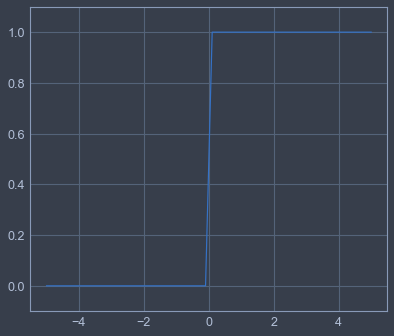

In [20]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32) # int로만 하면 warn

x = np.linspace(-5.0, 5.0)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

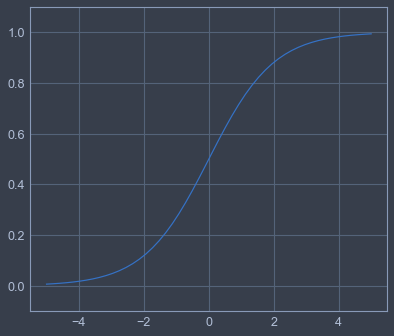

In [21]:
sigmoid = lambda x: 1 /(1+np.exp(-x))
x = np.linspace(-5.0,5.0)
plt.plot(x, sigmoid(x))
plt.ylim(-0.1,1.1)
plt.show()

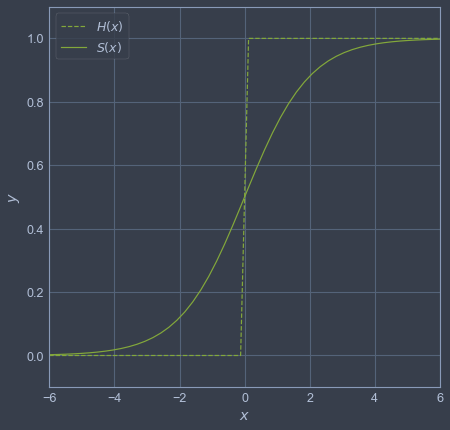

In [35]:
## plot figure 3-8

# 계단 함수, 시그모이드 함수
step = lambda x: np.array(x>0, dtype=np.int32)
sigmoid = lambda x: 1 /(1+np.exp(-x))

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-6,6)
y_step = step(x)
y_sig = sigmoid(x)

ax.plot(x,y_step, '--', label=r'$H(x)$', c='g')
ax.plot(x,y_sig, label=r'$S(x)$', c='g')
ax.set_xlim(-6,6); ax.set_ylim(-0.1, 1.1)
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

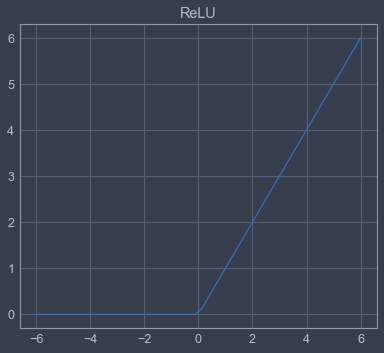

In [38]:
relu = lambda x: np.maximum(0,x)

x = np.linspace(-6,6)
y = relu(x)

plt.plot(x,y); plt.title('ReLU'); plt.show()

In [40]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
A.shape

(2, 2)

In [41]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [42]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1) + B1

In [43]:
A1

array([0.3, 0.7, 1.1])

In [44]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [47]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [48]:
identity = lambda x:x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2,W3)+B3
Y = identity(A3)
Y

array([0.31682708, 0.69627909])

In [49]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [ ]:
import multiprocessing  as mp
mp.cpu_count()

In [ ]:
import random

def random_walk_(seed_):
    random.seed(seed_)
    
    fig = plt.figure(figsize=(12,6))
    
    for i in range(100):
        walk_ = [0]
        for j in range(100):
            walk_.append(random.uniform(-1,1) + walk_[-1])
        plt.plot(walk_,alpha=0.5)
        
    plt.savefig(f'{seed_}.png')
    plt.close(fig)
    
    return None

random_walk_(0)

In [ ]:
def process_A():
    list(map(random_walk_, range(48)))

In [ ]:
import time

# signle core processing
start = int(time.time())
process_A()
print(int(time.time() - start))

In [ ]:
# 다중 코어 processing
from multiprocessing import Pool

def process_B():
    num_cores = 4
    pool = Pool(num_cores)
    pool.map(random_walk_,range(48))

start = int(time.time())
process_B()
print(int(time.time() - start))

In [2]:
def softmax(a):
    c = np.max(a) # overflow 대책
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [3]:
np.sum(y)

1.0

In [5]:
import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)
